In this project, I will look at data from the stock market, especially for the technology stocks. It includes getting stock information, visualizing it and analyzing the risk of a stock based on its performance history. And finally, I'll do some predictions to the future stock prices via Monte Carlo method.

Questions to be solved:


- What was the change in price of the stock over time?
- What was the daily return of the stock on average?
- What was the mobing average of the various stocks?
- What was the correlation between different stocks' closing prices?
- What was the correlation between different stocks' daily returns?
- How much value do we put at risk by investing in a particular stock?
- How can we attempt to predict future stock behavior?

In [3]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [27]:
from pandas_datareader import data, wb

from datetime import datetime

from pandas_datareader.data import DataReader

from __future__ import division

In [28]:
#Use Yahoo and Pandas to grab some stock data from tech stocks:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [29]:
end = datetime.now()

start = datetime(end.year-1,end.month,end.day)

In [30]:
for stock in tech_list:
    globals()[stock] =DataReader(stock,'yahoo',start,end)
    
#Now, we have four data frames and it's all stock information.

In [33]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-29,1129.099976,1108.219971,1127.520020,1116.459961,1538200,1116.459961
2019-05-30,1123.130005,1112.119995,1115.540039,1117.949951,951900,1117.949951
2019-05-31,1109.599976,1100.180054,1101.290039,1103.630005,1507800,1103.630005
2019-06-03,1065.500000,1025.000000,1065.500000,1036.229980,5130600,1036.229980
2019-06-04,1056.050049,1033.689941,1042.900024,1053.050049,2833500,1053.050049


In [34]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,256.192047,250.436969,252.936023,253.546732,3.353064e+07,252.087937
std,43.862714,42.677891,43.118137,43.469474,1.713816e+07,43.940984
min,177.919998,170.270004,175.440002,173.300003,1.136200e+07,171.256134
25%,212.884998,208.837502,210.684998,209.847496,2.186125e+07,207.795982
50%,258.879990,250.699997,255.770004,257.184998,2.851040e+07,255.117470
75%,293.687500,285.654991,287.167503,289.679993,3.804492e+07,288.415413
max,327.850006,323.350006,324.739990,327.200012,1.067212e+08,326.316681


In [35]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2019-05-29 to 2020-05-29
Data columns (total 6 columns):
High         254 non-null float64
Low          254 non-null float64
Open         254 non-null float64
Close        254 non-null float64
Volume       254 non-null float64
Adj Close    254 non-null float64
dtypes: float64(6)
memory usage: 13.9 KB


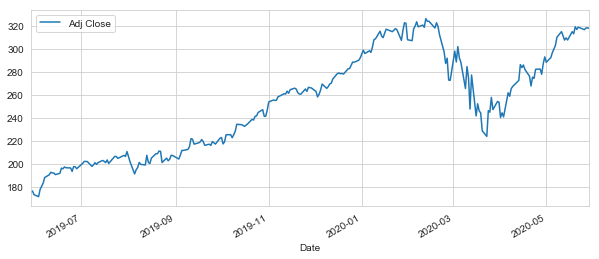

In [37]:
#Take a look at the historical view of the closing price:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

It mapped out the adjusted closing price for a year worth of Apple stock and we did it in one line.

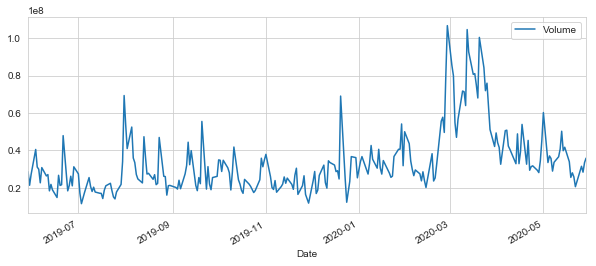

In [38]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

It shows the total colume of stock being traded each day over the past year.